In [560]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [561]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [562]:
data = pd.read_csv('ShortTermPred.csv')
data.shape
data.columns
data.head()

,0,DayOfWeek,VisitingTeam_Team,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame,yankees_WinLossRatio,orioles_WinLossRatio,redsox_WinLossRatio,WinLossRatio,WinLossRatioLast10,GamesBack
0,1978-04-14,Fri,DET,0,35761.0,1,5.8,0.0,1978,4,1.0,0.0,-3,-5,-1,-3,-3.0,-2
1,1978-04-15,Sat,DET,0,15024.0,2,4.9,0.0,1978,4,0.0,0.0,-2,-4,0,-2,-2.0,-2
2,1978-04-16,Sun,DET,0,17088.0,3,8.6,0.0,1978,4,0.0,0.0,-1,-3,1,-3,-3.0,-4
3,1978-04-17,Mon,KCA,0,10169.0,4,10.2,0.0,1978,4,0.0,0.0,0,-4,2,-4,-4.0,-6
4,1978-04-18,Tue,KCA,0,10218.0,5,11.0,1.4,1978,4,0.0,0.0,-1,-3,3,-5,-5.0,-8


In [563]:
## Set index datetime

data['0']=pd.to_datetime(data['0'],format='%Y-%m-%d')  ## convert to datetime
data.set_index('0', inplace = True) ## set datetime as index
data.head()

,DayOfWeek,VisitingTeam_Team,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame,yankees_WinLossRatio,orioles_WinLossRatio,redsox_WinLossRatio,WinLossRatio,WinLossRatioLast10,GamesBack
0,,,,,,,,,,,,,,,,,
1978-04-14,Fri,DET,0,35761.0,1,5.8,0.0,1978,4,1.0,0.0,-3,-5,-1,-3,-3.0,-2
1978-04-15,Sat,DET,0,15024.0,2,4.9,0.0,1978,4,0.0,0.0,-2,-4,0,-2,-2.0,-2
1978-04-16,Sun,DET,0,17088.0,3,8.6,0.0,1978,4,0.0,0.0,-1,-3,1,-3,-3.0,-4
1978-04-17,Mon,KCA,0,10169.0,4,10.2,0.0,1978,4,0.0,0.0,0,-4,2,-4,-4.0,-6
1978-04-18,Tue,KCA,0,10218.0,5,11.0,1.4,1978,4,0.0,0.0,-1,-3,3,-5,-5.0,-8


In [564]:
######## Options

#Code day of week as weekend/friday/weekday

#data.loc[data['DayOfWeek'] == 'Sat','Weekend'] = 1
#data.loc[data['DayOfWeek'] == 'Sun','Weekend'] = 1
#data.loc[data['DayOfWeek'] == 'Mon','Weekday'] = 1
#data.loc[data['DayOfWeek'] == 'Tue','Weekday'] = 1
#data.loc[data['DayOfWeek'] == 'Wed','Weekday'] = 1
#data.loc[data['DayOfWeek'] == 'Thu','Weekday'] = 1
#data.loc[data['DayOfWeek'] == 'Fri','Friday'] = 1
#data['Weekend'] = data['Weekend'].fillna(0)
#data['Weekday'] = data['Weekday'].fillna(0)
#data['Friday'] = data['Friday'].fillna(0)
#data.drop('DayOfWeek',inplace=True,axis=1)
#data.head()


### Polynomial winloss
#data['WinLossRatioSquared'] = data['WinLossRatio'] **2
#data['WinLossRatioLast10Squared'] = data['WinLossRatioLast10'] **2
#polyfeatures = poly.fit_transform(data[['WinLossRatio','WinLossRatioLast10']])
#polyfeatures.shape


### Month as categorical
#data['month'].replace(3,'March',inplace=True)
#data['month'].replace(4,'April',inplace=True)
#data['month'].replace(5,'May',inplace=True)
#data['month'].replace(6,'June',inplace=True)
#data['month'].replace(7,'July',inplace=True)
#data['month'].replace(8,'August',inplace=True)
#data['month'].replace(9,'September',inplace=True)
#data['month'].replace(10,'October',inplace=True)
#data = data.iloc[2500:,:]#restrict to recent years

In [565]:
## Get list of categorical and numerical columns

#Categorical_cols = []
#Numerical_cols = []

#for column,coltype in zip(data.iloc[:,1:].columns,data.iloc[:,1:].dtypes):
#    if coltype == 'object':
#        Categorical_cols.append(column)
#    else: Numerical_cols.append(column)


In [566]:
## Dummy coding for multinomial variables

data = pd.concat([data,pd.get_dummies(data['DayOfWeek'],prefix='Day')],axis=1)
data.drop(['DayOfWeek'],axis=1, inplace=True)
data = pd.concat([data,pd.get_dummies(data['VisitingTeam_Team'],prefix='Opponent')],axis=1)
data.drop(['VisitingTeam_Team'],axis=1, inplace=True)
#data = pd.concat([data,pd.get_dummies(data['month'],prefix='month')],axis=1)
#data.drop(['month'],axis=1, inplace=True)

In [567]:
data.head()

,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame,yankees_WinLossRatio,...,Opponent_OAK,Opponent_PHI,Opponent_PIT,Opponent_SDN,Opponent_SEA,Opponent_SFN,Opponent_SLN,Opponent_TBA,Opponent_TEX,Opponent_WAS
0,,,,,,,,,,,,,,,,,,,,,
1978-04-14,0,35761.0,1,5.8,0.0,1978,4,1.0,0.0,-3,...,0,0,0,0,0,0,0,0,0,0
1978-04-15,0,15024.0,2,4.9,0.0,1978,4,0.0,0.0,-2,...,0,0,0,0,0,0,0,0,0,0
1978-04-16,0,17088.0,3,8.6,0.0,1978,4,0.0,0.0,-1,...,0,0,0,0,0,0,0,0,0,0
1978-04-17,0,10169.0,4,10.2,0.0,1978,4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1978-04-18,0,10218.0,5,11.0,1.4,1978,4,0.0,0.0,-1,...,0,0,0,0,0,0,0,0,0,0


In [568]:
###################### Normal train/test split

#y = data['Attendance']
#X = data.iloc[:,1:]
#X = X.drop('Attendance',axis=1)


###################### Have test data to be year 2018
X_train=data[data.index.year < 2016]
X_train=X_train.drop('Attendance',axis=1)
X_holdout=data[data.index.year > 2015]
X_holdout=X_holdout.drop('Attendance',axis=1)

y_holdout=data[data.index.year > 2015]['Attendance']
y_train=data[data.index.year < 2016]['Attendance']

In [569]:
##Numerical variable list
#Numerical_cols = ['GameNumber','WinLossRatio','WinLossRatioLast10','max_temperature','year','month']
#Numerical_cols = ['GameNumber','WinLossRatio','WinLossRatioLast10','max_temperature','month']
#Numerical_cols = ['GameNumber','WinLossRatio','WinLossRatioLast10','max_temperature','month','WinLossRatioSquared','WinLossRatioLast10Squared']
Numerical_cols = ['GameNumber','WinLossRatio','WinLossRatioLast10','max_temperature','precipitation','month','yankees_WinLossRatio','orioles_WinLossRatio','redsox_WinLossRatio','GamesBack','year']
Other_cols = X_train.columns.drop(Numerical_cols)

In [570]:
#X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
X.head()

,DayNight,GameNumber,WinLossRatio,WinLossRatioLast10,max_temperature,precipitation,HomeOpener,Soccergame,Day_Fri,Day_Mon,...,Opponent_TEX,Opponent_WAS,month_April,month_August,month_July,month_June,month_March,month_May,month_October,month_September
0,0,1,0,0,5.8,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,2,1,1,4.9,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,3,0,0,8.6,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,4,-1,-1,10.2,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,5,-2,-2,11.0,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [571]:
## Scale numerical predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[Numerical_cols])
X_holdout_scaled = scaler.transform(X_holdout[Numerical_cols])

/Users/davidmaillet/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidmaillet/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/davidmaillet/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [572]:
##Merge numerical and categorical variables
X_train_final = np.append(X_train_scaled,X_train[Other_cols],axis=1)
X_holdout_final = np.append(X_holdout_scaled, X_holdout[Other_cols],axis=1)

In [573]:
LinRegression = LinearRegression()
LinRegression.fit(X_train_final,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [574]:
preds=LinRegression.predict(X_holdout_final)

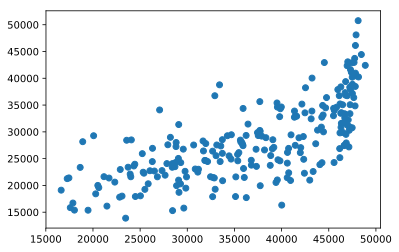

In [575]:
dfpreds_df=pd.DataFrame(columns=['yholdout','ypreds'])
dfpreds_df['yholdout']=y_holdout
dfpreds_df['ypreds']=preds

plt.scatter(y_holdout, preds);


In [576]:
dfpreds_df.corr()

,yholdout,ypreds
yholdout,1.000000,0.709942
ypreds,0.709942,1.000000


In [577]:
forest = RandomForestRegressor() # you code here
forest.fit(X_train_final,y_train)

/Users/davidmaillet/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [578]:
forest_params = {'max_depth': list(range(10, 25)), 
                  'min_samples_leaf': list(range(5, 20)),
                  'max_features': list(range(5,20))}

locally_best_forest = GridSearchCV(forest,forest_params, cv=5)
locally_best_forest.fit(X_train_final,y_train)

/Users/davidmaillet/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [579]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 19, 'min_samples_leaf': 5},
 -0.05140684442836093)

In [580]:
forestpreds = locally_best_forest.predict(X_holdout_final)

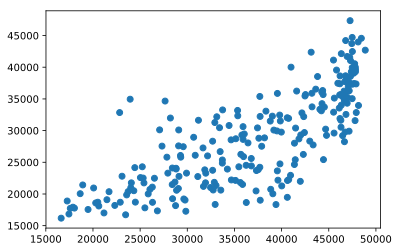

In [581]:
forestpreds_df=pd.DataFrame(columns=['yholdout','forestpreds'])
forestpreds_df['yholdout']=y_holdout
forestpreds_df['forestpreds']=preds

plt.scatter(y_holdout, forestpreds);

In [582]:
dfpreds_df['ForestPreds'] = forestpreds
dfpreds_df.corr()

,yholdout,ypreds,ForestPreds
yholdout,1.000000,0.709942,0.777838
ypreds,0.709942,1.000000,0.759983
ForestPreds,0.777838,0.759983,1.000000


In [583]:
##Estimate importance of random forest coefficients
rf_importance = pd.DataFrame(data=locally_best_forest.best_estimator_.feature_importances_,columns=['coefficients'],index=data.columns.drop('Attendance')) # you code here
rf_importance.sort_values('coefficients',ascending=False)

,coefficients
redsox_WinLossRatio,0.369398
HomeOpener,0.140040
GameNumber,0.093037
DayNight,0.080548
orioles_WinLossRatio,0.068425
Soccergame,0.047710
WinLossRatio,0.045473
yankees_WinLossRatio,0.039266
Opponent_NYA,0.030085
month,0.019929
